# Práctica 1: Perceptrón multicapa.

Tu jefe pidió a RH que recolectara datos de desempeño de tus compañeros, los resultados se almacenaron en un csv. El punto critico de estos datos es la satisfacción del empleado, entonces ¿Podremos estimar la satisfacción de los empleados con los datos recabados?.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models


df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

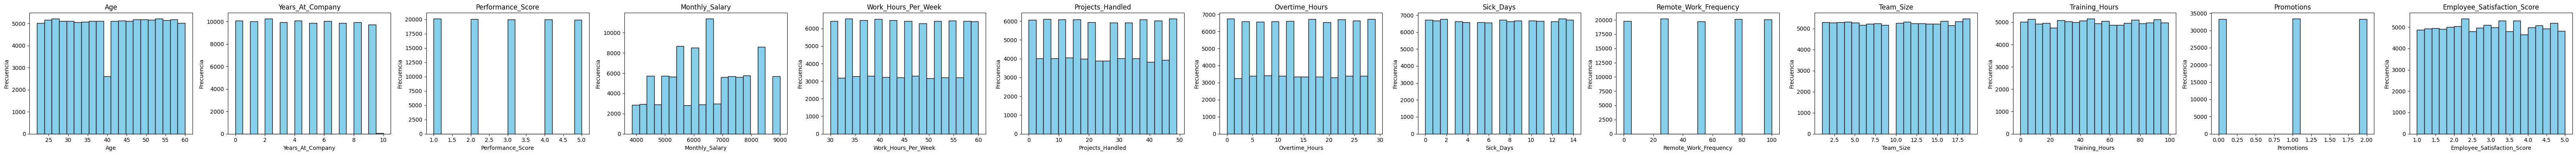

In [7]:
# Filtrar las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).drop('Employee_ID',axis=1)


# Si numeric_columns es un Index, conviértelo a lista
cols = list(numeric_columns)

fig, axes = plt.subplots(1, len(cols), figsize=(5 * len(cols), 4))

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Problemas**, tenemos distribuciones con picos, esos nos indica categorías. Por otro lado, tenemos variables con "valles" en su distribución (distribuciones multimodales) por lo que resultaría óptimo aplicar técnicas de feature engeneering. Por último tenemos distribuciones uniformes, por lo que cada una requeriría un procesamiento indivudual, hagamos la vista gorda e intentemos ajustar un MLP con estos datos, solo estandaricemos nuestros datos.

---

## Implementación de Red:

To**memos los datos numéricos como nuestra variable X, y la variable objetivo como ***'Employee_Satisfaction_Score'***.
- **Actividad 1**: Para todos los strings ``'@modif@'`` que aparescan en el siguiente bloque de código cámbialos para que el código funcione.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

X = numeric_columns.drop('Employee_Satisfaction_Score', axis=1)
y = numeric_columns['Employee_Satisfaction_Score']
y = y.apply(lambda x: round(x) - 1)  # Cambiamos la variable objetivo a 5 categorías numéricas

scaler = StandardScaler()
X_standar = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standar, y, test_size=0.33, random_state=42)

y_onehot_train = tf.keras.utils.to_categorical(y_train, 5)
y_onehot_test = tf.keras.utils.to_categorical(y_test, 5)

- **Actividad 2:** Implementa 3 arquitecturas de MLP, cada una con su propio nombre, cambiando la estructura de dichas arquitecturas (capas, neuronas por capa, función de activación, etc). 

In [9]:
from tensorflow.keras import Sequential, layers

# Arquitectura 1: MLP Simple - Pocas capas, activación ReLU
mlp_simple = Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), name='hidden_1'),
    layers.Dense(32, activation='relu', name='hidden_2'),
    layers.Dense(5, activation='softmax', name='output')
], name='MLP_Simple')

print("Arquitectura 1 - MLP Simple:")
mlp_simple.summary()
print("\n" + "="*50 + "\n")

# Arquitectura 2: MLP Profundo - Más capas, activación tanh, dropout
mlp_profundo = Sequential([
    layers.Dense(128, activation='tanh', input_shape=(X_train.shape[1],), name='hidden_1'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='tanh', name='hidden_2'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='tanh', name='hidden_3'),
    layers.Dense(16, activation='tanh', name='hidden_4'),
    layers.Dense(5, activation='softmax', name='output')
], name='MLP_Profundo')

print("Arquitectura 2 - MLP Profundo:")
mlp_profundo.summary()
print("\n" + "="*50 + "\n")

# Arquitectura 3: MLP Híbrido - Combinación de activaciones, BatchNormalization
mlp_hibrido = Sequential([
    layers.Dense(96, activation='relu', input_shape=(X_train.shape[1],), name='hidden_1'),
    layers.BatchNormalization(),
    layers.Dense(48, activation='swish', name='hidden_2'),
    layers.Dropout(0.25),
    layers.Dense(24, activation='elu', name='hidden_3'),
    layers.BatchNormalization(),
    layers.Dense(12, activation='relu', name='hidden_4'),
    layers.Dense(5, activation='softmax', name='output')
], name='MLP_Hibrido')

print("Arquitectura 3 - MLP Híbrido:")
mlp_hibrido.summary()

Arquitectura 1 - MLP Simple:


/Users/simei/Desktop/Hybridge/deep_learning/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "MLP_Simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 3,077 (12.02 KB)

 Non-trainable params: 0 (0.00 B)



Arquitectura 2 - MLP Profundo:


Model: "MLP_Profundo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_4 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,613 (49.27 KB)

 Trainable params: 12,613 (49.27 KB)

 Non-trainable params: 0 (0.00 B)



Arquitectura 3 - MLP Híbrido:


Model: "MLP_Hibrido"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 96)             │         1,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 48)             │         4,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 24)             │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24)             │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_4 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,925 (30.96 KB)

 Trainable params: 7,685 (30.02 KB)

 Non-trainable params: 240 (960.00 B)

- **Actividad 3:** Compila y ajusta tus tres modelos con sus respectivos hiperparámetros.

In [10]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# ========== COMPILACIÓN DE MODELOS ==========

# Modelo 1: MLP Simple - Configuración básica
mlp_simple.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Modelo 1 - MLP Simple compilado con:")
print("- Optimizer: Adam (lr=0.001)")
print("- Loss: categorical_crossentropy")
print("- Metrics: accuracy\n")

# Modelo 2: MLP Profundo - Configuración con momentum
mlp_profundo.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Modelo 2 - MLP Profundo compilado con:")
print("- Optimizer: SGD (lr=0.01, momentum=0.9)")
print("- Loss: categorical_crossentropy")
print("- Metrics: accuracy\n")

# Modelo 3: MLP Híbrido - Configuración adaptativa
mlp_hibrido.compile(
    optimizer=RMSprop(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Modelo 3 - MLP Híbrido compilado con:")
print("- Optimizer: RMSprop (lr=0.005)")
print("- Loss: categorical_crossentropy")
print("- Metrics: accuracy\n")

# ========== CALLBACKS PARA ENTRENAMIENTO ==========

# Early stopping para evitar overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Reducir learning rate cuando se estanque
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.0001
)

print("Callbacks configurados:")
print("- EarlyStopping: patience=10, monitor=val_loss")
print("- ReduceLROnPlateau: factor=0.5, patience=5\n")

# ========== ENTRENAMIENTO DE MODELOS ==========

print("Iniciando entrenamiento de los modelos...\n")

# Entrenar Modelo 1: MLP Simple
print("Entrenando MLP Simple...")
history_simple = mlp_simple.fit(
    X_train, y_onehot_train,
    validation_data=(X_test, y_onehot_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\n" + "="*60 + "\n")

# Entrenar Modelo 2: MLP Profundo
print("Entrenando MLP Profundo...")
history_profundo = mlp_profundo.fit(
    X_train, y_onehot_train,
    validation_data=(X_test, y_onehot_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\n" + "="*60 + "\n")

# Entrenar Modelo 3: MLP Híbrido
print("Entrenando MLP Híbrido...")
history_hibrido = mlp_hibrido.fit(
    X_train, y_onehot_train,
    validation_data=(X_test, y_onehot_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\n" + "="*60 + "\n")
print("¡Entrenamiento de todos los modelos completado!")

Modelo 1 - MLP Simple compilado con:
- Optimizer: Adam (lr=0.001)
- Loss: categorical_crossentropy
- Metrics: accuracy

Modelo 2 - MLP Profundo compilado con:
- Optimizer: SGD (lr=0.01, momentum=0.9)
- Loss: categorical_crossentropy
- Metrics: accuracy

Modelo 3 - MLP Híbrido compilado con:
- Optimizer: RMSprop (lr=0.005)
- Loss: categorical_crossentropy
- Metrics: accuracy

Callbacks configurados:
- EarlyStopping: patience=10, monitor=val_loss
- ReduceLROnPlateau: factor=0.5, patience=5

Iniciando entrenamiento de los modelos...

Entrenando MLP Simple...
Epoch 1/100
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.2550 - loss: 1.5618 - val_accuracy: 0.2510 - val_loss: 1.5596 - learning_rate: 0.0010
Epoch 2/100
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.2550 - loss: 1.5618 - val_accuracy: 0.2510 - val_loss: 1.5596 - learning_rate: 0.0010
Epoch 2/100
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.2581 - loss: 1.5561 - val_accuracy: 0.2510 - val_loss

- **Actividad 4:** Sube tus cambios al repositorio, envía el link de tu repositorio a la actividad 2 de tu checkpoint 2 y contesta las preguntas de dicha actividad.

Evaluación de modelos en conjunto de prueba:

MLP Simple - Loss: 1.5583, Accuracy: 0.2511
MLP Simple - Loss: 1.5583, Accuracy: 0.2511
MLP Profundo - Loss: 1.5571, Accuracy: 0.2542
MLP Profundo - Loss: 1.5571, Accuracy: 0.2542
MLP Híbrido - Loss: 1.5568, Accuracy: 0.2530

MLP Híbrido - Loss: 1.5568, Accuracy: 0.2530



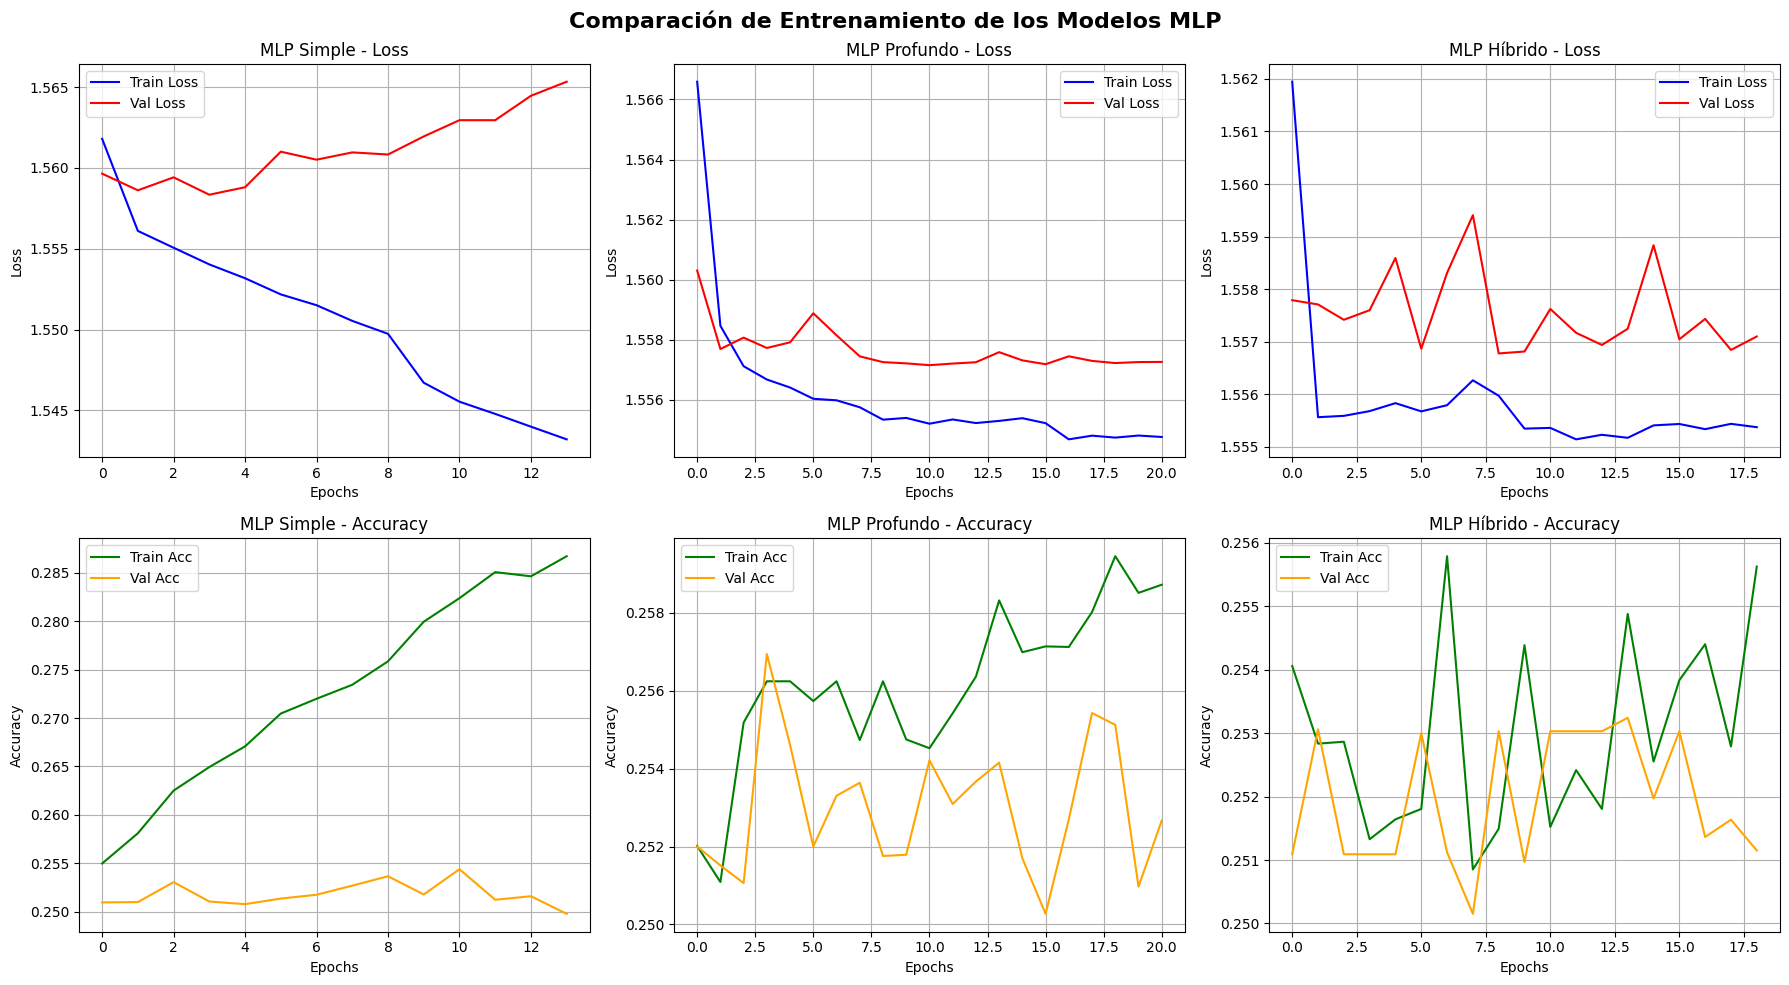


RESUMEN COMPARATIVO DE MODELOS
Modelo          Accuracy   Loss       Epochs  
--------------------------------------------------
MLP Simple      0.2511     1.5583     14      
MLP Profundo    0.2542     1.5571     21      
MLP Híbrido     0.2530     1.5568     19      

🏆 Mejor modelo: MLP Profundo con accuracy de 0.2542



In [11]:
# ========== EVALUACIÓN Y VISUALIZACIÓN DE RESULTADOS ==========

# Evaluar modelos en conjunto de prueba
print("Evaluación de modelos en conjunto de prueba:\n")

# Evaluación MLP Simple
loss_simple, acc_simple = mlp_simple.evaluate(X_test, y_onehot_test, verbose=0)
print(f"MLP Simple - Loss: {loss_simple:.4f}, Accuracy: {acc_simple:.4f}")

# Evaluación MLP Profundo
loss_profundo, acc_profundo = mlp_profundo.evaluate(X_test, y_onehot_test, verbose=0)
print(f"MLP Profundo - Loss: {loss_profundo:.4f}, Accuracy: {acc_profundo:.4f}")

# Evaluación MLP Híbrido
loss_hibrido, acc_hibrido = mlp_hibrido.evaluate(X_test, y_onehot_test, verbose=0)
print(f"MLP Híbrido - Loss: {loss_hibrido:.4f}, Accuracy: {acc_hibrido:.4f}\n")

# ========== GRÁFICAS DE ENTRENAMIENTO ==========

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparación de Entrenamiento de los Modelos MLP', fontsize=16, fontweight='bold')

# Gráficas de Loss
axes[0, 0].plot(history_simple.history['loss'], label='Train Loss', color='blue')
axes[0, 0].plot(history_simple.history['val_loss'], label='Val Loss', color='red')
axes[0, 0].set_title('MLP Simple - Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(history_profundo.history['loss'], label='Train Loss', color='blue')
axes[0, 1].plot(history_profundo.history['val_loss'], label='Val Loss', color='red')
axes[0, 1].set_title('MLP Profundo - Loss')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

axes[0, 2].plot(history_hibrido.history['loss'], label='Train Loss', color='blue')
axes[0, 2].plot(history_hibrido.history['val_loss'], label='Val Loss', color='red')
axes[0, 2].set_title('MLP Híbrido - Loss')
axes[0, 2].set_xlabel('Epochs')
axes[0, 2].set_ylabel('Loss')
axes[0, 2].legend()
axes[0, 2].grid(True)

# Gráficas de Accuracy
axes[1, 0].plot(history_simple.history['accuracy'], label='Train Acc', color='green')
axes[1, 0].plot(history_simple.history['val_accuracy'], label='Val Acc', color='orange')
axes[1, 0].set_title('MLP Simple - Accuracy')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].plot(history_profundo.history['accuracy'], label='Train Acc', color='green')
axes[1, 1].plot(history_profundo.history['val_accuracy'], label='Val Acc', color='orange')
axes[1, 1].set_title('MLP Profundo - Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True)

axes[1, 2].plot(history_hibrido.history['accuracy'], label='Train Acc', color='green')
axes[1, 2].plot(history_hibrido.history['val_accuracy'], label='Val Acc', color='orange')
axes[1, 2].set_title('MLP Híbrido - Accuracy')
axes[1, 2].set_xlabel('Epochs')
axes[1, 2].set_ylabel('Accuracy')
axes[1, 2].legend()
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

# ========== RESUMEN COMPARATIVO ==========

print("\n" + "="*60)
print("RESUMEN COMPARATIVO DE MODELOS")
print("="*60)

modelos_resultados = [
    ("MLP Simple", acc_simple, loss_simple, len(history_simple.history['loss'])),
    ("MLP Profundo", acc_profundo, loss_profundo, len(history_profundo.history['loss'])),
    ("MLP Híbrido", acc_hibrido, loss_hibrido, len(history_hibrido.history['loss']))
]

print(f"{'Modelo':<15} {'Accuracy':<10} {'Loss':<10} {'Epochs':<8}")
print("-" * 50)

for nombre, acc, loss, epochs in modelos_resultados:
    print(f"{nombre:<15} {acc:<10.4f} {loss:<10.4f} {epochs:<8}")

# Encontrar el mejor modelo
mejor_modelo = max(modelos_resultados, key=lambda x: x[1])
print(f"\n🏆 Mejor modelo: {mejor_modelo[0]} con accuracy de {mejor_modelo[1]:.4f}")

print("\n" + "="*60)